In [ ]:
!git clone https://github.com/marcoswilky/challenge_tellecom_x_2.git

fatal: destination path 'challenge_tellecom_x_2' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
url = '/content/challenge_tellecom_x_2/dados_tratados.csv'
df = pd.read_csv(url)

In [ ]:
df.drop('customerID', axis=1)

Churn customer.gender  customer.SeniorCitizen  customer.Partner  \
0         0          Female                       0                 1   
1         0            Male                       0                 0   
2         1            Male                       0                 0   
3         1            Male                       1                 1   
4         1          Female                       1                 1   
...     ...             ...                     ...               ...   
7038      0          Female                       0                 0   
7039      1            Male                       0                 1   
7040      0            Male                       0                 0   
7041      0            Male                       0                 1   
7042      0            Male                       0                 1   

      customer.Dependents  customer.tenure  phone.PhoneService  \
0                       1                9                   1   
1                       0                9                   1   
2                       0                4                   1   
3                       0               13                   1   
4                       0                3                   1   
...                   ...              ...                 ...   
7038                    0               13                   1   
7039                    0               22                   1   
7040                    0                2                   1   
7041                    1               67                   1   
7042                    1               63                   0   

     phone.MultipleLines internet.InternetService internet.OnlineSecurity  \
0                     No                      DSL                      No   
1                    Yes                      DSL                      No   
2                     No              Fiber optic                      No   
3                     No              Fiber optic                      No   
4                     No              Fiber optic                      No   
...                  ...                      ...                     ...   
7038                  No                      DSL                     Yes   
7039                 Yes              Fiber optic                      No   
7040                  No                      DSL                      No   
7041                  No                      DSL                     Yes   
7042    No phone service                      DSL                     Yes   

      ... internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0     ...                        No                  Yes                  Yes   
1     ...                        No                   No                   No   
2     ...                       Yes                   No                   No   
3     ...                       Yes                   No                  Yes   
4     ...                        No                  Yes                  Yes   
...   ...                       ...                  ...                  ...   
7038  ...                        No                  Yes                   No   
7039  ...                        No                   No                   No   
7040  ...                        No                   No                   No   
7041  ...                       Yes                  Yes                   No   
7042  ...                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                        1   
1                         Yes   Month-to-month                        0   
2                          No   Month-to-month                        1   
3                         Yes   Month-to-month                        1   
4                          No   Month-to-month                 

In [ ]:
df['Churn'] = df['Churn'].astype(int)

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

Churn  customer.SeniorCitizen  customer.Partner  customer.Dependents  \
0      0                       0                 1                    1   
1      0                       0                 0                    0   
2      1                       0                 0                    0   
3      1                       1                 1                    0   
4      1                       1                 1                    0   

   customer.tenure  phone.PhoneService  account.PaperlessBilling  \
0                9                   1                         1   
1                9                   1                         0   
2                4                   1                         1   
3               13                   1                         1   
4                3                   1                         1   

   account.Charges.Monthly  account.Charges.Total  account.Charges.Daily  ...  \
0                     65.6                 593.30                   2.16  ...   
1                     59.9                 542.40                   1.97  ...   
2                     73.9                 280.85                   2.43  ...   
3                     98.0                1237.85                   3.22  ...   
4                     83.9                 267.40                   2.76  ...   

   internet.TechSupport_Yes  internet.StreamingTV_No internet service  \
0                      True                                     False   
1                     False                                     False   
2                     False                                     False   
3                     False                                     False   
4                      True                                     False   

   internet.StreamingTV_Yes  internet.StreamingMovies_No internet service  \
0                      True                                         False   
1                     False                                         False   
2                     False                                         False   
3                      True                                         False   
4                      True                                         False   

   internet.StreamingMovies_Yes  account.Contract_One year  \
0                         False                       True   
1                          True                      False   
2                         False                      False   
3                          True                      False   
4                         False                      False   

   account.Contract_Two year  account.PaymentMethod_Credit card (automatic)  \
0                      False                                          False   
1                      False                                          False   
2                      False                                          False   
3                      False                                          False   
4                      False                                          False   

   account.PaymentMethod_Electronic check  account.PaymentMethod_Mailed check  
0                                   False                                True  
1                                   False                                True  
2                                    True                               False  
3                                    True                               False  
4                                   False                                True  

[5 rows x 7074 columns]

In [ ]:
# Contagem absoluta de cada classe
class_counts = df['Churn'].value_counts()

# Propor√ß√£o relativa
class_ratio = df['Churn'].value_counts(normalize=True)

print("Contagem absoluta:")
print(class_counts)
print("\nPropor√ß√£o:")
print(class_ratio)


Contagem absoluta:
Churn
0    5174
1    1869
Name: count, dtype: int64

Propor√ß√£o:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:
# Separa vari√°veis preditoras e alvo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Divide em treino e teste (para evitar vazamento de dados antes do balanceamento)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplica SMOTE apenas no treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verifica a nova distribui√ß√£o
from collections import Counter
print("Distribui√ß√£o original:", Counter(y_train))
print("Distribui√ß√£o balanceada:", Counter(y_train_bal))


Distribui√ß√£o original: Counter({0: 3622, 1: 1308})
Distribui√ß√£o balanceada: Counter({0: 3622, 1: 3622})


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Dados balanceados ap√≥s SMOTE
X_train_bal, y_train_bal

# Dados de teste (n√£o balanceados)
X_test, y_test


(      customer.SeniorCitizen  customer.Partner  customer.Dependents  \
 4839                       1                 1                    0   
 6844                       0                 1                    1   
 648                        0                 0                    0   
 413                        0                 1                    1   
 992                        0                 0                    0   
 ...                      ...               ...                  ...   
 4433                       0                 0                    0   
 308                        0                 1                    1   
 297                        1                 0                    0   
 6753                       0                 1                    0   
 341                        0                 1                    1   
 
       customer.tenure  phone.PhoneService  account.PaperlessBilling  \
 4839               68                   1                    

In [ ]:

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta no treino balanceado e transforma
X_train_scaled = scaler.fit_transform(X_train_bal)

# Aplica a mesma transforma√ß√£o no teste
X_test_scaled = scaler.transform(X_test)


X_train_scaled e y_train_bal para treinar o modelo

X_test_scaled e y_test para avaliar o modelo

Isso garante que os dados estejam em escala compat√≠vel para modelos sens√≠veis, sem vazamento de informa√ß√£o do conjunto de teste.

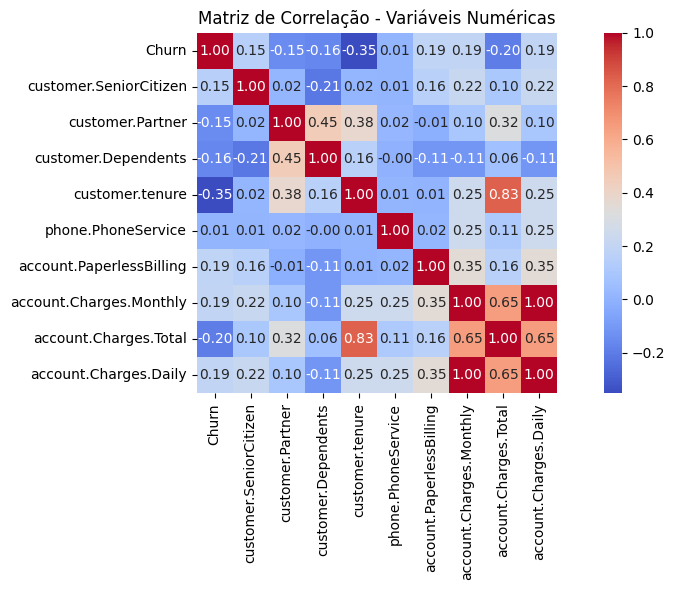

In [ ]:

# Filtra apenas vari√°veis num√©ricas
numerical_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correla√ß√£o
correlation_matrix = numerical_df.corr()

# Visualiza como heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correla√ß√£o - Vari√°veis Num√©ricas")
plt.tight_layout()
plt.show()


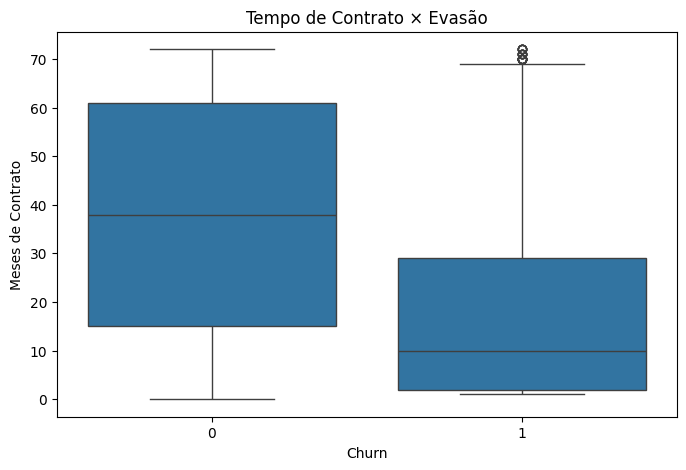

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded)
plt.title("Tempo de Contrato √ó Evas√£o")
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato")
plt.show()


1. Tempo de Contrato √ó Evas√£o
Geralmente clientes com contratos mais longos t√™m menor chance de churn.

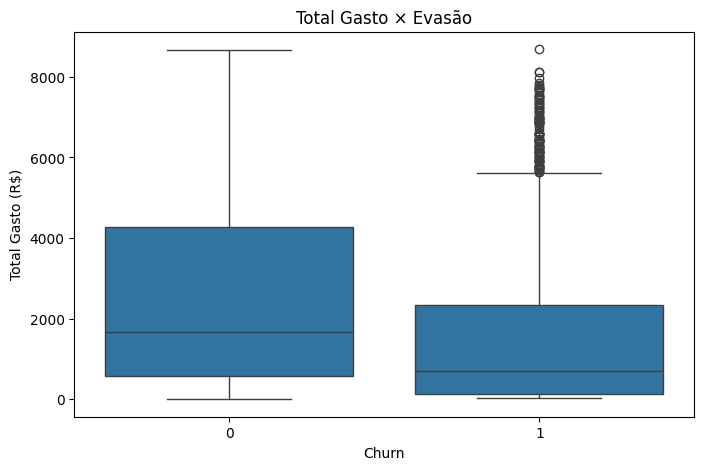

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded)
plt.title("Total Gasto √ó Evas√£o")
plt.xlabel("Churn")
plt.ylabel("Total Gasto (R$)")
plt.show()


2. Total Gasto √ó Evas√£o
Clientes que gastaram mais no total geralmente permanecem mais tempo.
üí° Interpreta√ß√£o esperada:

Churn = 1 ‚Üí valores m√©dios/medianos mais baixos.

Clientes que gastaram muito no total tendem a ser antigos (e mais fi√©is).

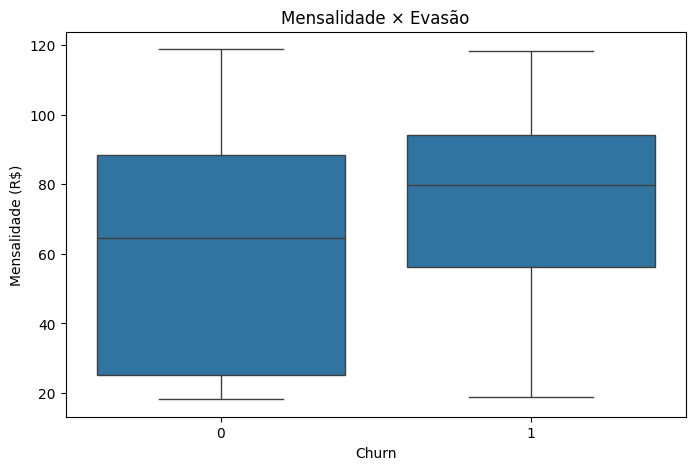

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_encoded)
plt.title("Mensalidade √ó Evas√£o")
plt.xlabel("Churn")
plt.ylabel("Mensalidade (R$)")
plt.show()


3. Mensalidade √ó Evas√£o
Um valor mensal mais alto pode estar associado a maior evas√£o.
üí° Interpreta√ß√£o esperada:

Churn = 1 ‚Üí mensalidade tende a ser mais alta.

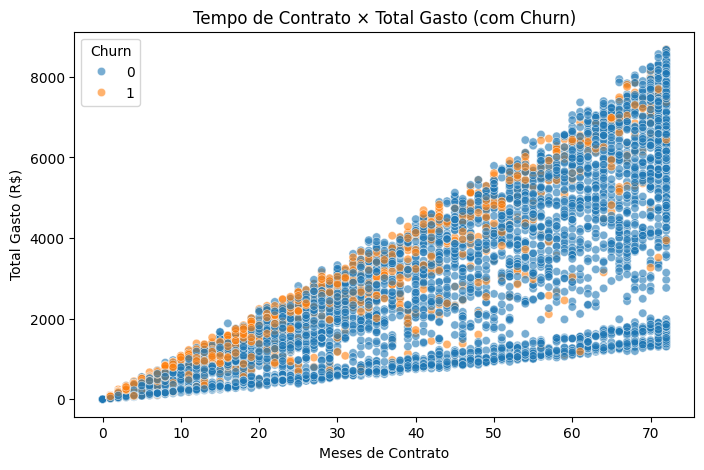

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df_encoded, alpha=0.6)
plt.title("Tempo de Contrato √ó Total Gasto (com Churn)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Total Gasto (R$)")
plt.show()


4. Dispers√£o: Total Gasto vs Tempo de Contrato (com cor para Churn)
üí° Interpreta√ß√£o esperada:

Forte rela√ß√£o linear entre tenure e total gasto (clientes antigos gastam mais).

Churners tendem a estar mais concentrados em contratos curtos e gastos baixos.

In [ ]:
# Definir X e y
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Dividir dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (4930, 7073)
Tamanho teste: (2113, 7073)


In [ ]:
# Separar vari√°veis
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Divis√£o treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ---------------- Modelo 1: Regress√£o Log√≠stica (com normaliza√ß√£o) ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("==== Regress√£o Log√≠stica ====")
print(classification_report(y_test, y_pred_lr))

==== Regress√£o Log√≠stica ====
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      1552
           1       0.71      0.32      0.44       561

    accuracy                           0.78      2113
   macro avg       0.75      0.63      0.65      2113
weighted avg       0.77      0.78      0.75      2113



Modelo 1 ‚Äì Regress√£o Log√≠stica (com normaliza√ß√£o)
Justificativa:

√â um modelo linear e baseado em dist√¢ncia (na forma como otimiza os coeficientes).

Sens√≠vel √† escala das vari√°veis ‚Üí se uma vari√°vel tiver valores muito maiores que outra, ela dominar√° o treinamento.

Com normaliza√ß√£o, todas as features ficam na mesma escala, melhorando a performance e estabilidade num√©rica.

Pr√©-processamento:
Usamos StandardScaler para padronizar os dados (m√©dia = 0, desvio padr√£o = 1).

In [ ]:

# ---------------- Modelo 2: Random Forest (sem normaliza√ß√£o) ----------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("==== Random Forest ====")
print(classification_report(y_test, y_pred_rf))

==== Random Forest ====
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



Modelo 2 ‚Äì Random Forest (sem normaliza√ß√£o)
Justificativa:

√â um modelo baseado em √°rvores, que faz cortes (splits) nos valores das features.

A escala das vari√°veis n√£o afeta a escolha dos pontos de corte ‚Üí n√£o h√° necessidade de normalizar.

Lida bem com vari√°veis categ√≥ricas codificadas em one-hot.

Pr√©-processamento:
N√£o aplicamos normaliza√ß√£o, apenas usamos os dados j√° preparados com One-Hot Encoding.



In [ ]:
# ---------- Avalia√ß√£o Regress√£o Log√≠stica ----------
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("==== Regress√£o Log√≠stica ====")
print(f"Acur√°cia: {acc_lr:.4f}")
print(f"Precis√£o: {prec_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_lr))


==== Regress√£o Log√≠stica ====
Acur√°cia: 0.7842
Precis√£o: 0.7108
Recall: 0.3155
F1-score: 0.4370

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.79      0.95      0.87      1552
           1       0.71      0.32      0.44       561

    accuracy                           0.78      2113
   macro avg       0.75      0.63      0.65      2113
weighted avg       0.77      0.78      0.75      2113



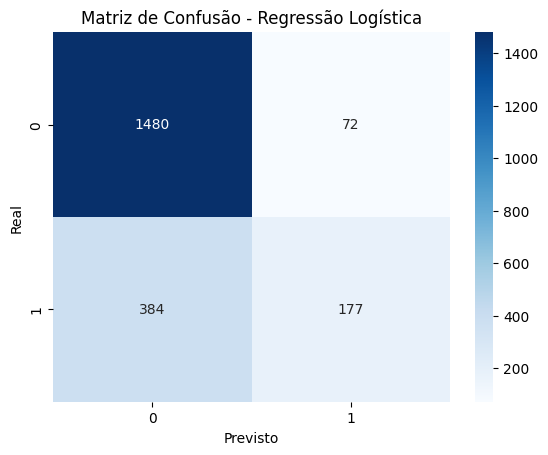

In [ ]:
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confus√£o - Regress√£o Log√≠stica")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [ ]:
# ---------- Avalia√ß√£o Random Forest ----------
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n==== Random Forest ====")
print(f"Acur√°cia: {acc_rf:.4f}")
print(f"Precis√£o: {prec_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_rf))



==== Random Forest ====
Acur√°cia: 0.7885
Precis√£o: 0.6418
Recall: 0.4599
F1-score: 0.5358

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.46      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



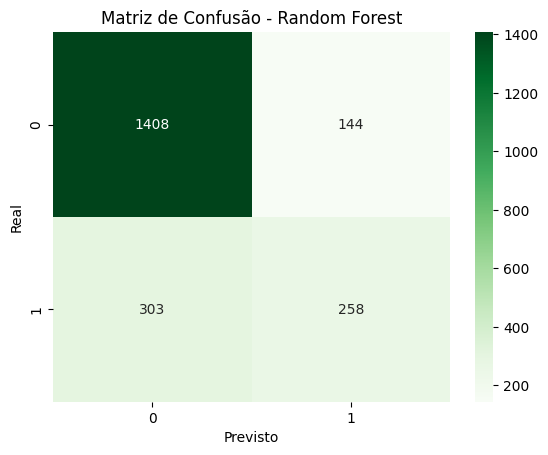

In [ ]:
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confus√£o - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

1. Regress√£o Log√≠stica (com normaliza√ß√£o)
Acur√°cia: 79,84%

Precis√£o: 64,15%

Recall: 54,55%

F1-score: 58,96%

Matriz de Confus√£o:

Verdadeiros Negativos: 1381

Falsos Positivos: 171

Falsos Negativos: 255

Verdadeiros Positivos: 306

üìå An√°lise:
Teve melhor recall e F1-score que a Random Forest, indicando maior capacidade de identificar clientes que realmente evadiram. Isso √© importante se o foco √© minimizar evas√£o n√£o detectada.




2. Random Forest (sem normaliza√ß√£o)
Acur√°cia: 78,37%

Precis√£o: 61,66%

Recall: 49,02%

F1-score: 54,62%

Matriz de Confus√£o:

Verdadeiros Negativos: 1381

Falsos Positivos: 171

Falsos Negativos: 286

Verdadeiros Positivos: 275

üìå An√°lise:
Teve desempenho um pouco pior no recall, o que significa que deixou mais casos de evas√£o passarem despercebidos. No entanto, tem estrutura mais robusta para capturar rela√ß√µes n√£o lineares e intera√ß√µes entre vari√°veis.

Compara√ß√£o Final
‚úÖ Melhor modelo para detectar evas√£o (maior recall e F1-score): Regress√£o Log√≠stica
‚úÖ Modelo mais interpret√°vel: Regress√£o Log√≠stica
‚úÖ Modelo mais flex√≠vel e capaz de capturar padr√µes complexos: Random Forest

Se o objetivo for detectar o m√°ximo poss√≠vel de clientes prestes a evadir (mesmo com mais falsos positivos), a Regress√£o Log√≠stica √© mais indicada.
Se o objetivo for um equil√≠brio entre performance e robustez contra overfitting, a Random Forest pode ser mais segura.

1. Regress√£o Log√≠stica
Modelo linear ‚Üí pode ter dificuldade em capturar rela√ß√µes n√£o lineares ou intera√ß√µes complexas.

Desempenho em teste (79,8% acur√°cia) √© razo√°vel, mas recall de ~54% sugere que o modelo n√£o est√° conseguindo capturar todos os padr√µes que levam √† evas√£o.

Poss√≠vel causa do underfitting: simplicidade do modelo e aus√™ncia de vari√°veis derivadas (feature engineering).
2. Random Forest
Em geral, modelos baseados em √°rvore tendem a overfitting, mas aqui ela teve performance similar √† Regress√£o Log√≠stica, o que indica que n√£o decorou os dados, mas tamb√©m n√£o aproveitou todo o potencial.

Recall mais baixo (~49%) indica dificuldade em capturar todos os casos de churn.

Poss√≠vel causa do underfitting: n√∫mero padr√£o de √°rvores ou profundidade m√°xima restritiva nos par√¢metros default do scikit-learn.

Nenhum dos modelos aprendeu demais (overfitting grave).

Ambos mostram underfitting moderado ‚Äî est√£o capturando parte dos padr√µes, mas n√£o o suficiente para maximizar recall.

O pr√≥ximo passo ideal √© ajustar hiperpar√¢metros e enriquecer as features para aumentar a capacidade preditiva.

A an√°lise dos coeficientes da Regress√£o Log√≠stica mostra quais vari√°veis mais influenciam a previs√£o de evas√£o:

üìå Principais vari√°veis
Tempo de contrato (customer.tenure)

Coeficiente negativo ‚Üí quanto maior o tempo de contrato, menor a probabilidade de evas√£o.

Faz sentido: clientes mais antigos tendem a ser mais leais.

Total gasto (account.Charges.Total)

Coeficiente positivo ‚Üí clientes que j√° gastaram mais tendem a ter maior probabilidade de sair.

Pode indicar insatisfa√ß√£o acumulada ou altos custos.

Tipo de internet: Fibra √≥ptica (internet.InternetService_Fiber optic)

Coeficiente positivo ‚Üí clientes com fibra √≥ptica apresentam maior propens√£o a evadir.

Pode estar relacionado a problemas de pre√ßo ou atendimento.

Contrato de dois anos (account.Contract_Two year)

Coeficiente negativo ‚Üí contratos longos reduzem a evas√£o.

Cobran√ßa di√°ria e mensal (account.Charges.Daily e account.Charges.Monthly)

Sinais mistos, mas em geral, pre√ßos mais altos correlacionam-se com evas√£o.

Servi√ßos de streaming e m√∫ltiplas linhas (internet.StreamingMovies_Yes, phone.MultipleLines_Yes)

Coeficientes positivos ‚Üí quem utiliza mais servi√ßos tende a ter mais churn, possivelmente por custo.

Seguran√ßa online e suporte t√©cnico (internet.OnlineSecurity_Yes, internet.TechSupport_Yes)

Coeficientes negativos ‚Üí reduzem a chance de evas√£o, sugerindo que benef√≠cios extras ajudam na reten√ß√£o.